# Simple DNN Model

In [1]:
#Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import  Dense,Dropout
from keras.models import Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

##### 1)Loading Dataset

In [2]:
df=pd.read_csv("df_SynonymReplacement.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,text,label,length,preprocessed_abstract,length_after_cleaning,tokenized_text
0,0,0,@VirginAmerica What @dhepburn said.,2,35,what say,8,"['what', 'say']"
1,1,1,@VirginAmerica plus you've added commercials t...,1,72,plus add commercial experience tacky,36,"['plus', 'add', 'commercial', 'experience', 't..."
2,2,2,@VirginAmerica I didn't today... Must mean I n...,2,71,i today must mean i need take another trip,42,"['i', 'today', 'must', 'mean', 'i', 'need', 't..."
3,3,3,@VirginAmerica it's really aggressive to blast...,0,126,really aggressive blast obnoxious entertainmen...,78,"['really', 'aggressive', 'blast', 'obnoxious',..."
4,4,4,@VirginAmerica and it's a really big bad thing...,0,55,really big bad thing,20,"['really', 'big', 'bad', 'thing']"


In [3]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
text                      0
label                     0
length                    0
preprocessed_abstract    49
length_after_cleaning     0
tokenized_text            0
dtype: int64

In [4]:
df = df.dropna()

#####  2) Split , into Training and Validation Sets (80:20)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_abstract'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)
print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (21988,) (21988,)
Test data: (5497,) (5497,)


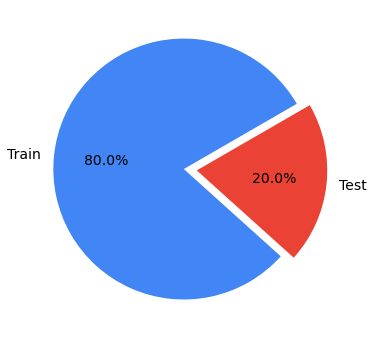

In [6]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0.05),
        startangle=30);

In [7]:
vect= TfidfVectorizer(min_df=20)
X_train_idf = vect.fit_transform(X_train)
X_test_idf = vect.transform(X_test)

print('X_train_TF-IDF shape: ', X_train_idf.shape)
print('X_test_TF-IDF shape: ', X_test_idf.shape)

X_train_TF-IDF shape:  (21988, 1260)
X_test_TF-IDF shape:  (5497, 1260)


##### 4)Model Architecture

In [8]:
model = Sequential([
    Dense(8,input_shape=(X_train_idf.shape[1],),kernel_regularizer='l2'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(3, activation='softmax')#This is a multi-class Classification problem
    
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 10088     
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 10395 (40.61 KB)
Trainable params: 10395 (40.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 5) Training Model

In [10]:
batch_size = 128
epochs = 2000
history=model.fit(X_train_idf.toarray(), y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1,validation_split=0.2)
history

Epoch 1/2000


138/138 [==============================] - 2s 5ms/step - loss: 1.2527 - accuracy: 0.3172 - val_loss: 1.2481 - val_accuracy: 0.3317
Epoch 2/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2439 - accuracy: 0.3269 - val_loss: 1.2395 - val_accuracy: 0.3313
Epoch 3/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2355 - accuracy: 0.3285 - val_loss: 1.2314 - val_accuracy: 0.3379
Epoch 4/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2276 - accuracy: 0.3333 - val_loss: 1.2237 - val_accuracy: 0.3438
Epoch 5/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2200 - accuracy: 0.3401 - val_loss: 1.2163 - val_accuracy: 0.3488
Epoch 6/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2128 - accuracy: 0.3442 - val_loss: 1.2093 - val_accuracy: 0.3515
Epoch 7/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.2060 - accuracy: 0.3467 - val_loss: 1.2027 - val_accurac

138/138 [==============================] - 0s 3ms/step - loss: 1.0729 - accuracy: 0.6047 - val_loss: 1.0731 - val_accuracy: 0.5982
Epoch 55/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.0716 - accuracy: 0.6046 - val_loss: 1.0719 - val_accuracy: 0.5973
Epoch 56/2000
138/138 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.6055 - val_loss: 1.0706 - val_accuracy: 0.5994
Epoch 57/2000
138/138 [==============================] - 0s 2ms/step - loss: 1.0690 - accuracy: 0.6071 - val_loss: 1.0694 - val_accuracy: 0.6025
Epoch 58/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.0678 - accuracy: 0.6092 - val_loss: 1.0681 - val_accuracy: 0.6032
Epoch 59/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.6115 - val_loss: 1.0669 - val_accuracy: 0.6039
Epoch 60/2000
138/138 [==============================] - 0s 3ms/step - loss: 1.0652 - accuracy: 0.6125 - val_loss: 1.0656 - val_accuracy: 0.6048

138/138 [==============================] - 0s 3ms/step - loss: 0.9897 - accuracy: 0.6228 - val_loss: 0.9927 - val_accuracy: 0.6114
Epoch 111/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9880 - accuracy: 0.6223 - val_loss: 0.9911 - val_accuracy: 0.6116
Epoch 112/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9862 - accuracy: 0.6218 - val_loss: 0.9894 - val_accuracy: 0.6121
Epoch 113/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9844 - accuracy: 0.6218 - val_loss: 0.9877 - val_accuracy: 0.6116
Epoch 114/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9827 - accuracy: 0.6222 - val_loss: 0.9860 - val_accuracy: 0.6116
Epoch 115/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9809 - accuracy: 0.6225 - val_loss: 0.9843 - val_accuracy: 0.6112
Epoch 116/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.9791 - accuracy: 0.6224 - val_loss: 0.9826 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.8906 - accuracy: 0.6420 - val_loss: 0.8994 - val_accuracy: 0.6326
Epoch 167/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8890 - accuracy: 0.6431 - val_loss: 0.8979 - val_accuracy: 0.6326
Epoch 168/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.6440 - val_loss: 0.8964 - val_accuracy: 0.6330
Epoch 169/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.6449 - val_loss: 0.8949 - val_accuracy: 0.6328
Epoch 170/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.6453 - val_loss: 0.8934 - val_accuracy: 0.6332
Epoch 171/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.6459 - val_loss: 0.8919 - val_accuracy: 0.6342
Epoch 172/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8808 - accuracy: 0.6468 - val_loss: 0.8904 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.8133 - accuracy: 0.6865 - val_loss: 0.8296 - val_accuracy: 0.6753
Epoch 223/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.6873 - val_loss: 0.8287 - val_accuracy: 0.6762
Epoch 224/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8111 - accuracy: 0.6878 - val_loss: 0.8277 - val_accuracy: 0.6778
Epoch 225/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8100 - accuracy: 0.6890 - val_loss: 0.8267 - val_accuracy: 0.6792
Epoch 226/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8089 - accuracy: 0.6922 - val_loss: 0.8258 - val_accuracy: 0.6803
Epoch 227/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.6945 - val_loss: 0.8248 - val_accuracy: 0.6864
Epoch 228/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.8068 - accuracy: 0.6968 - val_loss: 0.8239 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.7623 - accuracy: 0.7192 - val_loss: 0.7866 - val_accuracy: 0.7099
Epoch 279/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7616 - accuracy: 0.7192 - val_loss: 0.7860 - val_accuracy: 0.7103
Epoch 280/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7609 - accuracy: 0.7197 - val_loss: 0.7853 - val_accuracy: 0.7106
Epoch 281/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.7199 - val_loss: 0.7848 - val_accuracy: 0.7110
Epoch 282/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy: 0.7200 - val_loss: 0.7842 - val_accuracy: 0.7110
Epoch 283/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7587 - accuracy: 0.7205 - val_loss: 0.7836 - val_accuracy: 0.7121
Epoch 284/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7580 - accuracy: 0.7208 - val_loss: 0.7830 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.7378 - val_loss: 0.7588 - val_accuracy: 0.7199
Epoch 335/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.7381 - val_loss: 0.7584 - val_accuracy: 0.7199
Epoch 336/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.7384 - val_loss: 0.7580 - val_accuracy: 0.7194
Epoch 337/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.7382 - val_loss: 0.7576 - val_accuracy: 0.7192
Epoch 338/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7251 - accuracy: 0.7389 - val_loss: 0.7571 - val_accuracy: 0.7199
Epoch 339/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.7389 - val_loss: 0.7567 - val_accuracy: 0.7203
Epoch 340/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.7240 - accuracy: 0.7393 - val_loss: 0.7563 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.7511 - val_loss: 0.7374 - val_accuracy: 0.7290
Epoch 391/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.7509 - val_loss: 0.7370 - val_accuracy: 0.7285
Epoch 392/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.7511 - val_loss: 0.7366 - val_accuracy: 0.7287
Epoch 393/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.7512 - val_loss: 0.7363 - val_accuracy: 0.7290
Epoch 394/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.7515 - val_loss: 0.7360 - val_accuracy: 0.7287
Epoch 395/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.7518 - val_loss: 0.7356 - val_accuracy: 0.7296
Epoch 396/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.7516 - val_loss: 0.7352 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.7632 - val_loss: 0.7178 - val_accuracy: 0.7397
Epoch 447/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.7634 - val_loss: 0.7174 - val_accuracy: 0.7408
Epoch 448/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.7632 - val_loss: 0.7171 - val_accuracy: 0.7408
Epoch 449/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.7634 - val_loss: 0.7167 - val_accuracy: 0.7406
Epoch 450/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7634 - val_loss: 0.7164 - val_accuracy: 0.7406
Epoch 451/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.7641 - val_loss: 0.7160 - val_accuracy: 0.7408
Epoch 452/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.7642 - val_loss: 0.7157 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.7753 - val_loss: 0.6984 - val_accuracy: 0.7499
Epoch 503/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.7761 - val_loss: 0.6981 - val_accuracy: 0.7501
Epoch 504/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7759 - val_loss: 0.6977 - val_accuracy: 0.7497
Epoch 505/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.7762 - val_loss: 0.6974 - val_accuracy: 0.7508
Epoch 506/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.7761 - val_loss: 0.6971 - val_accuracy: 0.7508
Epoch 507/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.7763 - val_loss: 0.6967 - val_accuracy: 0.7508
Epoch 508/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.7767 - val_loss: 0.6963 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7865 - val_loss: 0.6794 - val_accuracy: 0.7581
Epoch 559/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.7862 - val_loss: 0.6791 - val_accuracy: 0.7583
Epoch 560/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.7861 - val_loss: 0.6787 - val_accuracy: 0.7583
Epoch 561/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.7863 - val_loss: 0.6784 - val_accuracy: 0.7581
Epoch 562/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.7866 - val_loss: 0.6781 - val_accuracy: 0.7581
Epoch 563/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7868 - val_loss: 0.6778 - val_accuracy: 0.7588
Epoch 564/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7869 - val_loss: 0.6774 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7960 - val_loss: 0.6624 - val_accuracy: 0.7658
Epoch 615/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.7964 - val_loss: 0.6621 - val_accuracy: 0.7658
Epoch 616/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7970 - val_loss: 0.6619 - val_accuracy: 0.7656
Epoch 617/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7970 - val_loss: 0.6616 - val_accuracy: 0.7656
Epoch 618/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7973 - val_loss: 0.6613 - val_accuracy: 0.7653
Epoch 619/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7971 - val_loss: 0.6610 - val_accuracy: 0.7653
Epoch 620/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7974 - val_loss: 0.6608 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.8028 - val_loss: 0.6487 - val_accuracy: 0.7667
Epoch 671/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.8028 - val_loss: 0.6484 - val_accuracy: 0.7672
Epoch 672/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.8032 - val_loss: 0.6482 - val_accuracy: 0.7669
Epoch 673/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.8037 - val_loss: 0.6480 - val_accuracy: 0.7669
Epoch 674/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.8033 - val_loss: 0.6478 - val_accuracy: 0.7669
Epoch 675/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.8039 - val_loss: 0.6476 - val_accuracy: 0.7669
Epoch 676/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.8030 - val_loss: 0.6474 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.8088 - val_loss: 0.6381 - val_accuracy: 0.7697
Epoch 727/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.8087 - val_loss: 0.6380 - val_accuracy: 0.7692
Epoch 728/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.8091 - val_loss: 0.6378 - val_accuracy: 0.7699
Epoch 729/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.8090 - val_loss: 0.6377 - val_accuracy: 0.7694
Epoch 730/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.8089 - val_loss: 0.6374 - val_accuracy: 0.7699
Epoch 731/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.8092 - val_loss: 0.6373 - val_accuracy: 0.7704
Epoch 732/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.8092 - val_loss: 0.6370 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.8119 - val_loss: 0.6300 - val_accuracy: 0.7722
Epoch 783/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.8118 - val_loss: 0.6299 - val_accuracy: 0.7726
Epoch 784/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.8116 - val_loss: 0.6297 - val_accuracy: 0.7729
Epoch 785/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.8116 - val_loss: 0.6296 - val_accuracy: 0.7729
Epoch 786/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.8121 - val_loss: 0.6295 - val_accuracy: 0.7726
Epoch 787/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.8122 - val_loss: 0.6293 - val_accuracy: 0.7722
Epoch 788/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.8119 - val_loss: 0.6292 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.8141 - val_loss: 0.6239 - val_accuracy: 0.7735
Epoch 839/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.8142 - val_loss: 0.6238 - val_accuracy: 0.7738
Epoch 840/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.8145 - val_loss: 0.6237 - val_accuracy: 0.7740
Epoch 841/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.8142 - val_loss: 0.6236 - val_accuracy: 0.7740
Epoch 842/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.8143 - val_loss: 0.6235 - val_accuracy: 0.7738
Epoch 843/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.8146 - val_loss: 0.6235 - val_accuracy: 0.7735
Epoch 844/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.8147 - val_loss: 0.6233 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.8176 - val_loss: 0.6192 - val_accuracy: 0.7706
Epoch 895/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.8181 - val_loss: 0.6192 - val_accuracy: 0.7713
Epoch 896/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.8181 - val_loss: 0.6192 - val_accuracy: 0.7708
Epoch 897/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8180 - val_loss: 0.6190 - val_accuracy: 0.7710
Epoch 898/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.8177 - val_loss: 0.6189 - val_accuracy: 0.7713
Epoch 899/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8181 - val_loss: 0.6189 - val_accuracy: 0.7715
Epoch 900/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.8177 - val_loss: 0.6188 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.8192 - val_loss: 0.6155 - val_accuracy: 0.7729
Epoch 951/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.8198 - val_loss: 0.6155 - val_accuracy: 0.7724
Epoch 952/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.8197 - val_loss: 0.6154 - val_accuracy: 0.7722
Epoch 953/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.8194 - val_loss: 0.6154 - val_accuracy: 0.7719
Epoch 954/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.8196 - val_loss: 0.6154 - val_accuracy: 0.7710
Epoch 955/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.8194 - val_loss: 0.6152 - val_accuracy: 0.7729
Epoch 956/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.8195 - val_loss: 0.6152 - val_accuracy: 

138/138 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.8209 - val_loss: 0.6127 - val_accuracy: 0.7724
Epoch 1007/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.8209 - val_loss: 0.6127 - val_accuracy: 0.7719
Epoch 1008/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8211 - val_loss: 0.6126 - val_accuracy: 0.7722
Epoch 1009/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.8209 - val_loss: 0.6126 - val_accuracy: 0.7719
Epoch 1010/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8215 - val_loss: 0.6126 - val_accuracy: 0.7724
Epoch 1011/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8208 - val_loss: 0.6125 - val_accuracy: 0.7722
Epoch 1012/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.8214 - val_loss: 0.6125 - val_accu

Epoch 1062/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.8231 - val_loss: 0.6104 - val_accuracy: 0.7731
Epoch 1063/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.8232 - val_loss: 0.6104 - val_accuracy: 0.7729
Epoch 1064/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.8234 - val_loss: 0.6103 - val_accuracy: 0.7729
Epoch 1065/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.8231 - val_loss: 0.6103 - val_accuracy: 0.7722
Epoch 1066/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.8233 - val_loss: 0.6103 - val_accuracy: 0.7726
Epoch 1067/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8231 - val_loss: 0.6102 - val_accuracy: 0.7726
Epoch 1068/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.8231 - val_loss: 0

Epoch 1118/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.8248 - val_loss: 0.6084 - val_accuracy: 0.7738
Epoch 1119/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.8249 - val_loss: 0.6083 - val_accuracy: 0.7738
Epoch 1120/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.8247 - val_loss: 0.6084 - val_accuracy: 0.7735
Epoch 1121/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.8243 - val_loss: 0.6083 - val_accuracy: 0.7742
Epoch 1122/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.8250 - val_loss: 0.6082 - val_accuracy: 0.7735
Epoch 1123/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.8249 - val_loss: 0.6083 - val_accuracy: 0.7740
Epoch 1124/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.8248 - val_loss: 0

Epoch 1174/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.8264 - val_loss: 0.6068 - val_accuracy: 0.7740
Epoch 1175/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.8261 - val_loss: 0.6069 - val_accuracy: 0.7747
Epoch 1176/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.8259 - val_loss: 0.6069 - val_accuracy: 0.7742
Epoch 1177/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.8259 - val_loss: 0.6068 - val_accuracy: 0.7740
Epoch 1178/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8259 - val_loss: 0.6067 - val_accuracy: 0.7740
Epoch 1179/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8262 - val_loss: 0.6067 - val_accuracy: 0.7742
Epoch 1180/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.8260 - val_loss: 0

Epoch 1230/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8264 - val_loss: 0.6055 - val_accuracy: 0.7758
Epoch 1231/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.8269 - val_loss: 0.6055 - val_accuracy: 0.7758
Epoch 1232/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.8269 - val_loss: 0.6054 - val_accuracy: 0.7756
Epoch 1233/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.8267 - val_loss: 0.6054 - val_accuracy: 0.7756
Epoch 1234/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.8268 - val_loss: 0.6054 - val_accuracy: 0.7756
Epoch 1235/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.8268 - val_loss: 0.6053 - val_accuracy: 0.7760
Epoch 1236/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8266 - val_loss: 0

Epoch 1286/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.8265 - val_loss: 0.6043 - val_accuracy: 0.7758
Epoch 1287/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.8262 - val_loss: 0.6043 - val_accuracy: 0.7760
Epoch 1288/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.8264 - val_loss: 0.6043 - val_accuracy: 0.7751
Epoch 1289/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.8265 - val_loss: 0.6043 - val_accuracy: 0.7756
Epoch 1290/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8265 - val_loss: 0.6042 - val_accuracy: 0.7758
Epoch 1291/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.8270 - val_loss: 0.6042 - val_accuracy: 0.7754
Epoch 1292/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.8265 - val_loss: 0

Epoch 1342/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.8271 - val_loss: 0.6033 - val_accuracy: 0.7754
Epoch 1343/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8269 - val_loss: 0.6032 - val_accuracy: 0.7749
Epoch 1344/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8269 - val_loss: 0.6032 - val_accuracy: 0.7749
Epoch 1345/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.8271 - val_loss: 0.6032 - val_accuracy: 0.7747
Epoch 1346/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.8269 - val_loss: 0.6032 - val_accuracy: 0.7756
Epoch 1347/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.8271 - val_loss: 0.6032 - val_accuracy: 0.7749
Epoch 1348/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.8273 - val_loss: 0

Epoch 1398/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.8279 - val_loss: 0.6026 - val_accuracy: 0.7747
Epoch 1399/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.8276 - val_loss: 0.6026 - val_accuracy: 0.7747
Epoch 1400/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.8279 - val_loss: 0.6026 - val_accuracy: 0.7742
Epoch 1401/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.8276 - val_loss: 0.6025 - val_accuracy: 0.7738
Epoch 1402/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.8279 - val_loss: 0.6025 - val_accuracy: 0.7738
Epoch 1403/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.8277 - val_loss: 0.6025 - val_accuracy: 0.7738
Epoch 1404/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.8273 - val_loss: 0

Epoch 1454/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.8284 - val_loss: 0.6019 - val_accuracy: 0.7747
Epoch 1455/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.8281 - val_loss: 0.6019 - val_accuracy: 0.7747
Epoch 1456/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.8282 - val_loss: 0.6019 - val_accuracy: 0.7749
Epoch 1457/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8280 - val_loss: 0.6020 - val_accuracy: 0.7729
Epoch 1458/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8287 - val_loss: 0.6019 - val_accuracy: 0.7735
Epoch 1459/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.8279 - val_loss: 0.6020 - val_accuracy: 0.7740
Epoch 1460/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8283 - val_loss: 0

Epoch 1510/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.8286 - val_loss: 0.6016 - val_accuracy: 0.7744
Epoch 1511/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.8283 - val_loss: 0.6015 - val_accuracy: 0.7744
Epoch 1512/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8283 - val_loss: 0.6016 - val_accuracy: 0.7744
Epoch 1513/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8282 - val_loss: 0.6014 - val_accuracy: 0.7742
Epoch 1514/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.8284 - val_loss: 0.6014 - val_accuracy: 0.7747
Epoch 1515/2000
138/138 [==============================] - 1s 4ms/step - loss: 0.4825 - accuracy: 0.8281 - val_loss: 0.6015 - val_accuracy: 0.7744
Epoch 1516/2000
138/138 [==============================] - 1s 4ms/step - loss: 0.4824 - accuracy: 0.8283 - val_loss: 0

Epoch 1566/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.8288 - val_loss: 0.6011 - val_accuracy: 0.7744
Epoch 1567/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8287 - val_loss: 0.6011 - val_accuracy: 0.7735
Epoch 1568/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8284 - val_loss: 0.6010 - val_accuracy: 0.7742
Epoch 1569/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.8286 - val_loss: 0.6010 - val_accuracy: 0.7749
Epoch 1570/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.8292 - val_loss: 0.6011 - val_accuracy: 0.7738
Epoch 1571/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.8286 - val_loss: 0.6011 - val_accuracy: 0.7742
Epoch 1572/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.8287 - val_loss: 0

Epoch 1622/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8289 - val_loss: 0.6007 - val_accuracy: 0.7729
Epoch 1623/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8289 - val_loss: 0.6007 - val_accuracy: 0.7733
Epoch 1624/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8291 - val_loss: 0.6008 - val_accuracy: 0.7733
Epoch 1625/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8287 - val_loss: 0.6007 - val_accuracy: 0.7733
Epoch 1626/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8293 - val_loss: 0.6007 - val_accuracy: 0.7735
Epoch 1627/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.8294 - val_loss: 0.6007 - val_accuracy: 0.7738
Epoch 1628/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.8294 - val_loss: 0

Epoch 1678/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8292 - val_loss: 0.6004 - val_accuracy: 0.7735
Epoch 1679/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8291 - val_loss: 0.6004 - val_accuracy: 0.7733
Epoch 1680/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8293 - val_loss: 0.6005 - val_accuracy: 0.7731
Epoch 1681/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.8293 - val_loss: 0.6004 - val_accuracy: 0.7735
Epoch 1682/2000
138/138 [==============================] - 1s 5ms/step - loss: 0.4761 - accuracy: 0.8293 - val_loss: 0.6004 - val_accuracy: 0.7729
Epoch 1683/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.8297 - val_loss: 0.6004 - val_accuracy: 0.7733
Epoch 1684/2000
138/138 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.8292 - val_loss: 0

Epoch 1734/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8301 - val_loss: 0.6002 - val_accuracy: 0.7738
Epoch 1735/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.8298 - val_loss: 0.6003 - val_accuracy: 0.7731
Epoch 1736/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8296 - val_loss: 0.6001 - val_accuracy: 0.7735
Epoch 1737/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8301 - val_loss: 0.6001 - val_accuracy: 0.7738
Epoch 1738/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8296 - val_loss: 0.6002 - val_accuracy: 0.7735
Epoch 1739/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8299 - val_loss: 0.6002 - val_accuracy: 0.7729
Epoch 1740/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8294 - val_loss: 0

Epoch 1790/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8305 - val_loss: 0.6000 - val_accuracy: 0.7735
Epoch 1791/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8301 - val_loss: 0.6001 - val_accuracy: 0.7738
Epoch 1792/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8298 - val_loss: 0.6001 - val_accuracy: 0.7733
Epoch 1793/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8300 - val_loss: 0.6000 - val_accuracy: 0.7733
Epoch 1794/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8304 - val_loss: 0.6000 - val_accuracy: 0.7735
Epoch 1795/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.8298 - val_loss: 0.6000 - val_accuracy: 0.7733
Epoch 1796/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.8301 - val_loss: 0

Epoch 1846/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.8297 - val_loss: 0.5998 - val_accuracy: 0.7738
Epoch 1847/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8304 - val_loss: 0.5998 - val_accuracy: 0.7733
Epoch 1848/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8300 - val_loss: 0.5999 - val_accuracy: 0.7735
Epoch 1849/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8301 - val_loss: 0.5999 - val_accuracy: 0.7731
Epoch 1850/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8300 - val_loss: 0.5999 - val_accuracy: 0.7731
Epoch 1851/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8304 - val_loss: 0.6001 - val_accuracy: 0.7735
Epoch 1852/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8301 - val_loss: 0

Epoch 1902/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8301 - val_loss: 0.5997 - val_accuracy: 0.7747
Epoch 1903/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8303 - val_loss: 0.5997 - val_accuracy: 0.7740
Epoch 1904/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8305 - val_loss: 0.5997 - val_accuracy: 0.7740
Epoch 1905/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8308 - val_loss: 0.5997 - val_accuracy: 0.7749
Epoch 1906/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8304 - val_loss: 0.5998 - val_accuracy: 0.7740
Epoch 1907/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8306 - val_loss: 0.5999 - val_accuracy: 0.7733
Epoch 1908/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8302 - val_loss: 0

Epoch 1958/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8308 - val_loss: 0.5996 - val_accuracy: 0.7744
Epoch 1959/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8305 - val_loss: 0.5996 - val_accuracy: 0.7747
Epoch 1960/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8310 - val_loss: 0.5997 - val_accuracy: 0.7744
Epoch 1961/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8306 - val_loss: 0.5996 - val_accuracy: 0.7744
Epoch 1962/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8307 - val_loss: 0.5996 - val_accuracy: 0.7749
Epoch 1963/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8308 - val_loss: 0.5996 - val_accuracy: 0.7744
Epoch 1964/2000
138/138 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8305 - val_loss: 0

##### 6) Finding Training and Testing Accuracy

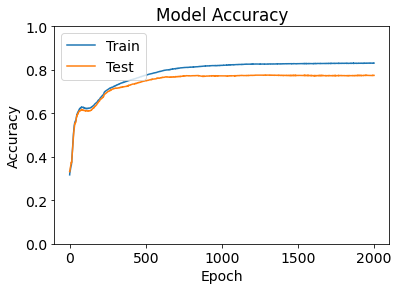

In [11]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
test_loss,test_acc=model.evaluate(X_test_idf.toarray(),y_test)
print(f'Test Accuracy: {test_acc} and Test Loss: {test_loss}')

172/172 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7666
Test Accuracy: 0.7665999531745911 and Test Loss: 0.6192203164100647


##### 7) Compute and plot the confusion matrix for the three classes

In [13]:
predictions=model.predict(X_test_idf.toarray())
class_labels = ['negative', 'positive','neutral']
predicted_class_labels = [class_labels[np.argmax(pred)] for pred in predictions]
actual_class_labels=[class_labels[actual] for actual in y_test]
print(classification_report(actual_class_labels, predicted_class_labels))

172/172 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.78      0.77      0.77      1835
     neutral       0.72      0.72      0.72      1827
    positive       0.80      0.81      0.80      1835

    accuracy                           0.77      5497
   macro avg       0.77      0.77      0.77      5497
weighted avg       0.77      0.77      0.77      5497



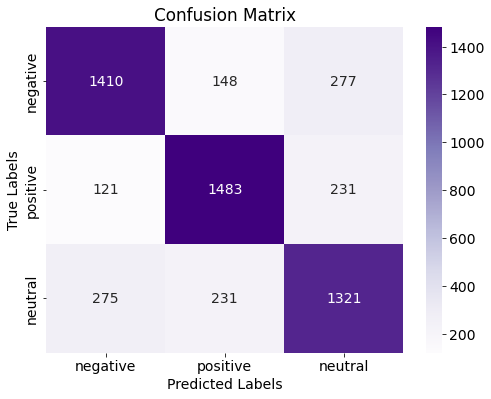

In [14]:
conf_matrix = confusion_matrix(actual_class_labels, predicted_class_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### 8) Saving the final results in Excel sheet

In [15]:
precision_per_class = precision_score(actual_class_labels, predicted_class_labels, average=None)
recall_per_class = recall_score(actual_class_labels, predicted_class_labels, average=None)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)

Precision per class: [0.7807309  0.7222526  0.79645542]
Recall per class: [0.76839237 0.72304324 0.80817439]


In [16]:
f1_micro = f1_score(actual_class_labels, predicted_class_labels, average='micro')
f1_macro = f1_score(actual_class_labels, predicted_class_labels, average='macro')

print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Micro F1 Score: 0.766599963616518
Macro F1 Score: 0.766477437165849


In [19]:
result=pd.read_csv('SimpleDNNModelResults.csv')
result['SynonymReplacement_Dataset']=[max(history.history['accuracy']),test_acc,f1_micro,f1_macro,precision_per_class[0],precision_per_class[1],precision_per_class[2],recall_per_class[0],recall_per_class[1],recall_per_class[2]]
result[['Unnamed: 0','SynonymReplacement_Dataset']]

,Unnamed: 0,SynonymReplacement_Dataset
0,Training Accuracy,0.831325
1,Testing Accuracy,0.766600
2,Micro F1 Score,0.766600
3,Macro F1 Score,0.766477
4,Precision for Negative sentiment,0.780731
5,Precision for Positive sentiment,0.722253
6,Precision for Neutral sentiment,0.796455
7,Recall for Negative sentiment,0.768392
8,Recall for Positive sentiment,0.723043
9,Recall for Neutral sentiment,0.808174


In [20]:
result.to_csv('SimpleDNNModelResults.csv', index=False)